<p style="font-family: times, serif; font-size:25pt; font-style:italic">
Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Изучение общей информации о датафрейме

In [2]:
import pandas as pd 

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', index_col=0)
except:
    data = pd.read_csv('G:\DataS\projects/real_estate_data.csv', sep = '\t', index_col=0)


In [3]:
data.head(20)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,,,,,,,,,,,,,,,,,,,,,
20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0


In [4]:
data.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  float64
 6   living_area           21796 non-null  float64
 7   floor                 23699 non-null  int64  
 8   is_apartment          2775 non-null   object 
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  kitchen_area          21421 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18157 non-null  float64
 15  cityCenters_nearest   

In [5]:
data.isna().sum() #выявление количества пропусков

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Из полученных данных видно, что в файле много пропущенных значений:**

► ceiling_height 38,8% пропусков

► floors_total 0.4%

► living_area 8%

► is_apartment 88%
 
► kitchen_area 9.6%
 
► balcony 48.6%

► locality_name 0.2%
 
► airports_nearest 23.4%

► cityCenters_nearest 23.3% 

► parks_nearest 65.9%

► ponds_around3000 23.3%

► days_exposition 13.4%

► ponds_nearest 61.6%

<AxesSubplot:ylabel='Frequency'>

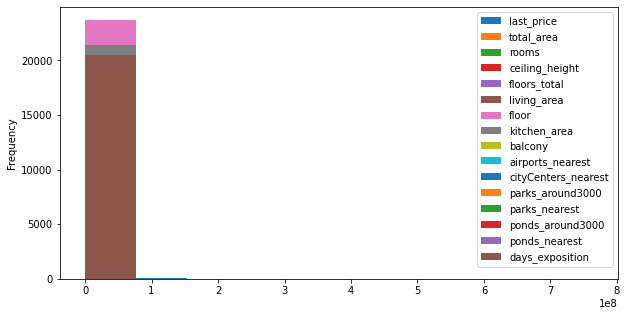

In [6]:
data.plot(kind='hist', figsize=(10, 5)) #общая гистограмма

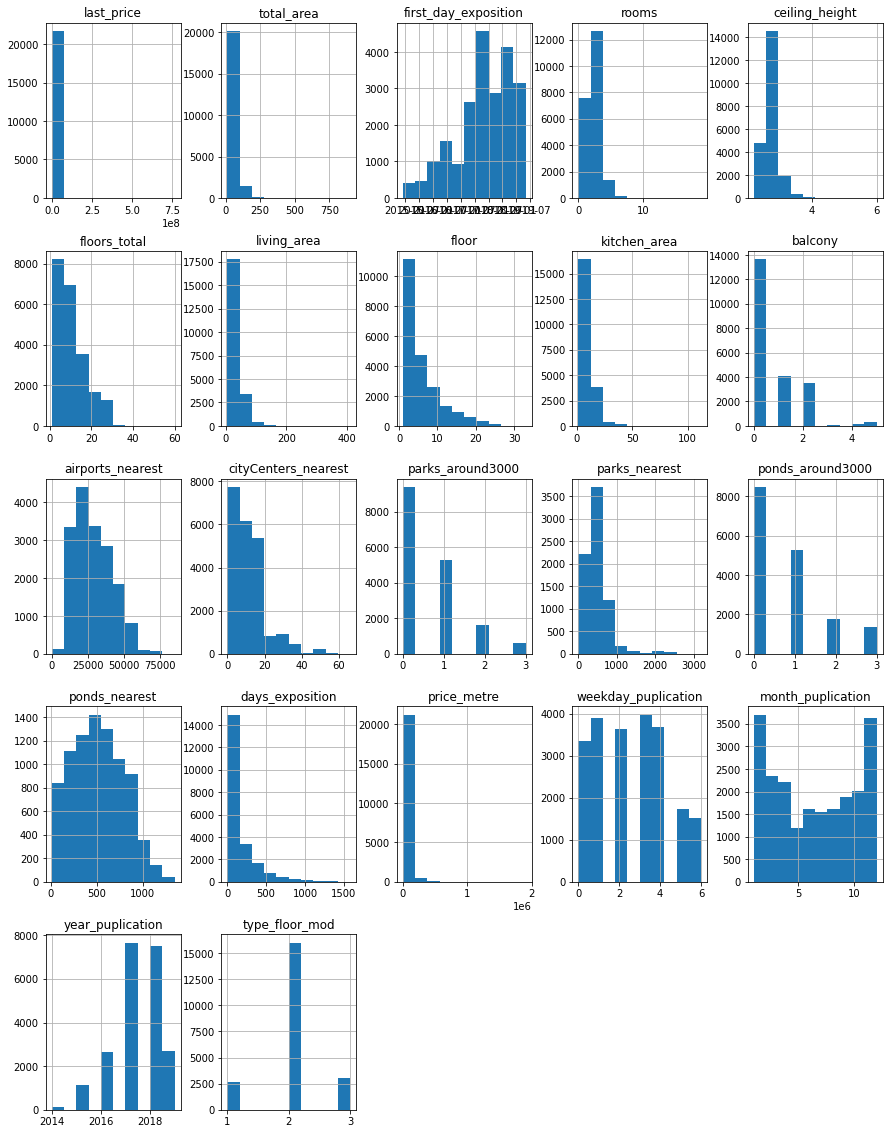

In [93]:
data.hist(figsize=(15, 20)); #гистограммы по каждому столбцу

Из полученнх гистограмм можно получить общее представление о данных датафрейма. Например, 
    

► примерное количество комнат в объектах;

► этажность домов;

► пределы жилой площади;

► количество балконов;

► расстояние до ближайших парков;

► расстояние до ближайших прудов;

► длительность высталенных объявлений.

# Предобработка пропущенных значений.

## Значения в balcony.

Скорее всего если количество балконов не указано, то их нет, значит можно заменить 0 (так было сказано в задании).

In [8]:
data['balcony'] = data['balcony'].fillna(0) #заполнение пропусков 0

data.isna().sum() #проверка заполнения пропусков

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

## Пропуски в days_exposition 

Замена медианой пропуски в длительности размещения объявлений.

In [9]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) 

data.isna().sum() #проверка замены столбца

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [10]:
data.loc[data["floors_total"]== 0, "floors_total"] = data["floor"] 

В тех квартирах, где не указана общая этажность дома я решила пропуски заполнить этажами квартир. Ведь квартира на 5 этаже не может находиться в трехэтажном доме

## Значения living_area 

Выявление неадекватных значений жилой площади объектов

In [4]:
list(data['living_area'].sort_values().unique())

[2.0,
 3.0,
 5.0,
 5.4,
 6.0,
 6.5,
 8.0,
 8.3,
 8.4,
 8.5,
 8.9,
 9.0,
 9.1,
 9.8,
 10.0,
 10.08,
 10.3,
 10.4,
 10.5,
 10.52,
 10.55,
 10.6,
 10.7,
 10.76,
 10.8,
 10.9,
 10.93,
 10.94,
 11.0,
 11.1,
 11.15,
 11.2,
 11.3,
 11.38,
 11.4,
 11.47,
 11.5,
 11.6,
 11.7,
 11.79,
 11.88,
 11.9,
 11.99,
 12.0,
 12.08,
 12.1,
 12.18,
 12.2,
 12.28,
 12.3,
 12.5,
 12.6,
 12.7,
 12.71,
 12.79,
 12.8,
 12.81,
 12.9,
 13.0,
 13.05,
 13.09,
 13.1,
 13.15,
 13.2,
 13.27,
 13.3,
 13.32,
 13.34,
 13.37,
 13.4,
 13.46,
 13.5,
 13.54,
 13.56,
 13.59,
 13.6,
 13.62,
 13.66,
 13.7,
 13.73,
 13.76,
 13.79,
 13.8,
 13.82,
 13.89,
 13.9,
 13.92,
 14.0,
 14.01,
 14.02,
 14.03,
 14.06,
 14.08,
 14.1,
 14.11,
 14.16,
 14.17,
 14.19,
 14.2,
 14.22,
 14.23,
 14.25,
 14.28,
 14.3,
 14.31,
 14.35,
 14.37,
 14.38,
 14.39,
 14.4,
 14.41,
 14.45,
 14.46,
 14.47,
 14.5,
 14.51,
 14.55,
 14.56,
 14.57,
 14.58,
 14.59,
 14.6,
 14.62,
 14.64,
 14.65,
 14.69,
 14.7,
 14.71,
 14.73,
 14.74,
 14.77,
 14.8,
 14.85,
 14.89,
 

In [96]:
data['living_area'].sort_values().unique() 

1778

In [12]:
data['living_area'] = data['living_area']. fillna(0) 
#пропуски в living_area заменим на 0

In [13]:
data = data.loc[(data['living_area'] != 2)& #удалим объекты площадью 2
                (data['living_area'] != 3)& #удалим объекты площадью 3
                (data['living_area'] != 0)& #удалим объекты площадью 0
                (data['living_area'] != 5)& #удалим объекты площадью 5
                (data['living_area'] != 5.4)] #удалим объекты площадью 5.4

## Изменение типа данных

### Тип данных first_day_exposition

In [14]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
#переделаем на datetime, но без времени.
data['first_day_exposition']

/tmp/ipykernel_504/1265153887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')


total_images
20   2019-03-07
7    2018-12-04
10   2015-08-20
2    2018-06-19
10   2018-09-10
        ...    
9    2016-08-05
9    2017-03-21
14   2018-01-15
18   2018-02-11
4    2017-07-21
Name: first_day_exposition, Length: 21790, dtype: datetime64[ns]


Формат даты публикации не содержит время, поэтому при изменении типа данных я оставила только число

причину, что он ругается - я не выяснила

### Тип данных balcony

In [15]:
data['balcony'] = data['balcony'].astype('int') 
#изменим тип данных balcony с плавающей точкой на целочисленные
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21790 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            21790 non-null  float64       
 1   total_area            21790 non-null  float64       
 2   first_day_exposition  21790 non-null  datetime64[ns]
 3   rooms                 21790 non-null  int64         
 4   ceiling_height        13704 non-null  float64       
 5   floors_total          21737 non-null  float64       
 6   living_area           21790 non-null  float64       
 7   floor                 21790 non-null  int64         
 8   is_apartment          2655 non-null   object        
 9   studio                21790 non-null  bool          
 10  open_plan             21790 non-null  bool          
 11  kitchen_area          20978 non-null  float64       
 12  balcony               21790 non-null  int64         
 13  locality_name      

/tmp/ipykernel_504/3033021746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].astype('int')


### Тип данных days_exposition

In [16]:
data['days_exposition'] = data['days_exposition'].astype('int')
#изменим тип данных days_exposition с плавающей точкой на целочисленные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21790 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            21790 non-null  float64       
 1   total_area            21790 non-null  float64       
 2   first_day_exposition  21790 non-null  datetime64[ns]
 3   rooms                 21790 non-null  int64         
 4   ceiling_height        13704 non-null  float64       
 5   floors_total          21737 non-null  float64       
 6   living_area           21790 non-null  float64       
 7   floor                 21790 non-null  int64         
 8   is_apartment          2655 non-null   object        
 9   studio                21790 non-null  bool          
 10  open_plan             21790 non-null  bool          
 11  kitchen_area          20978 non-null  float64       
 12  balcony               21790 non-null  int64         
 13  locality_name      

/tmp/ipykernel_504/634488114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_exposition'] = data['days_exposition'].astype('int')


### Тип данных cityCenters_nearest

In [17]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0) #заполнение пропусков значением 0
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int') #изменение типа данных на целочисленное
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21790 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            21790 non-null  float64       
 1   total_area            21790 non-null  float64       
 2   first_day_exposition  21790 non-null  datetime64[ns]
 3   rooms                 21790 non-null  int64         
 4   ceiling_height        13704 non-null  float64       
 5   floors_total          21737 non-null  float64       
 6   living_area           21790 non-null  float64       
 7   floor                 21790 non-null  int64         
 8   is_apartment          2655 non-null   object        
 9   studio                21790 non-null  bool          
 10  open_plan             21790 non-null  bool          
 11  kitchen_area          20978 non-null  float64       
 12  balcony               21790 non-null  int64         
 13  locality_name      

/tmp/ipykernel_504/1061725518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0) #заполнение пропусков значением 0
/tmp/ipykernel_504/1061725518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int') #изменение типа данных на целочисленное


### Тип данных last_price

In [18]:
data['last_price'] = data['last_price'].astype('int') #изменение типа данных на целочисленное
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21790 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            21790 non-null  int64         
 1   total_area            21790 non-null  float64       
 2   first_day_exposition  21790 non-null  datetime64[ns]
 3   rooms                 21790 non-null  int64         
 4   ceiling_height        13704 non-null  float64       
 5   floors_total          21737 non-null  float64       
 6   living_area           21790 non-null  float64       
 7   floor                 21790 non-null  int64         
 8   is_apartment          2655 non-null   object        
 9   studio                21790 non-null  bool          
 10  open_plan             21790 non-null  bool          
 11  kitchen_area          20978 non-null  float64       
 12  balcony               21790 non-null  int64         
 13  locality_name      

/tmp/ipykernel_504/2595585474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_price'] = data['last_price'].astype('int') #изменение типа данных на целочисленное


## Неявные дубликаты в locality_name

Я думаю, что уже давно понятно, что я тупенькая, но терпеливая....

In [19]:
import warnings

warnings.filterwarnings('ignore') #пришлось пойти на такие меры (игнор предупреждений)

In [20]:
data['locality_name'].unique() #поиск уникальных значений столбца с названиями населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [21]:
len(data['locality_name'].unique()) #чтобы в конце было с чем сравнить 

349

In [22]:
data['locality_name'] = data['locality_name'].replace('городской посёлок Янино-1', 'городской поселок Янино-1' )
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Мурино','Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('поселок Коммунары', 'Коммунар')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Красный Бор', 'поселок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'городской посёлок Фёдоровское')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Лебяжье', 'поселок городского типа Лебяжье')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Кузьмоловский', 'деревня Кузьмолово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Кузьмоловский', 'деревня Кузьмолово') 
data['locality_name'] = data['locality_name'].replace('поселок Кингисеппский','Кингисепп')
data['locality_name'] = data['locality_name'].replace('посёлок Аннино', 'поселок Аннино')
data['locality_name'] = data['locality_name'].replace('посёлок Новый Свет', 'поселок Новый Свет')
data['locality_name'] = data['locality_name'].replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].replace('посёлок Бугры', 'поселок Бугры')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Рощино','поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('городской посёлок Рощино','поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('посёлок Усть-Луга','поселок Усть-Луга')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Павлово', 'село Павлово')
data['locality_name'] = data['locality_name'].replace('городской посёлок Павлово', 'село Павлово')
data['locality_name'] = data['locality_name'].replace('посёлок Победа','поселок Победа')
data['locality_name'] = data['locality_name'].replace('посёлок Терволово','поселок Терволово')
data['locality_name'] = data['locality_name'].replace('городской посёлок Советский',  'поселок городского типа Советский')
data['locality_name'] = data['locality_name'].replace('посёлок Петровское','поселок Петровское')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Токсово','поселок городского типа Токсово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Вырица','поселок городского типа Вырица')
data['locality_name'] = data['locality_name'].replace('посёлок Тельмана', 'поселок Тельмана')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Большая Ижора', 'городской поселок Большая Ижора')
data['locality_name'] = data['locality_name'].replace('городской посёлок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья','поселок городского типа Рахья')
data['locality_name'] = data['locality_name'].replace('посёлок Гаврилово', 'поселок Гаврилово')
len(data['locality_name'].unique()) #теперь выясним сколько стало уникальных значений 'locality_name'

318

Изменения есть - значит не зря я потратила несколько часов. Мне пытались рассказать какой-то волшебный метод в питоне, который решил бы данную проблему проще, но.... там выше я уже обьяснила

## Выбивающиеся значения

In [23]:
data['ceiling_height'].sort_values().unique()
#проверим уникальные значения потолков и отсортируем в порядке возрастания

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.4 ,
         2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,   2.52,
         2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,   2.6 ,
         2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,   2.68,
         2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,   2.76,
         2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,   2.84,
         2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,   2.92,
         2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   3.  ,   3.01,
         3.02,   3.03,   3.04,   3.05,   3.06,   3.07,   3.08,   3.09,
         3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,   3.16,   3.17,
         3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,   3.25,   3.26,
         3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,   3.33,   3.34,
         3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,   3.43,
         3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.51,
      

Из полученных данных можно сразу же догадаться, что сверхвысоких и сверхнизких потолков не бывает, поэтому строчки с такими значениями лучше вовсе удалить

In [24]:
import matplotlib.pyplot as plt

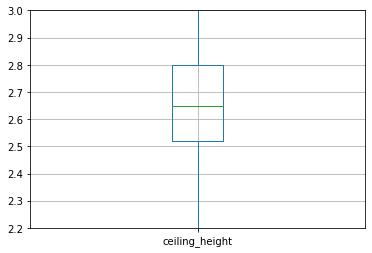

In [25]:
data.boxplot(column ='ceiling_height')
plt.ylim(2.2, 3)
plt.show()

In [26]:
data = data.loc[(data['ceiling_height'] != 100)& #удалим значения высотой 100
                (data['ceiling_height'] != 1)&  #удалим значения высотой 1
                (data['ceiling_height'] != 20)&  #удалим значения высотой 20
                (data['ceiling_height'] != 10.3)& #удалим значения высотой 10.3 
                (data['ceiling_height'] != 1.2)&  #удалим значения высотой 1.2
                (data['ceiling_height'] != 14)&   #удалим значения высотой 14              
                (data['ceiling_height'] != 2)& #удалим значения высотой 2
                (data['ceiling_height'] != 8)& #удалим значения высотой 8
                (data['ceiling_height'] != 8.3)& #удалим значения высотой 8.3
                (data['ceiling_height'] != 1.75)] #удалим значения высотой 1.75

In [27]:
data['ceiling_height'].sort_values().unique() #проверка изменений

array([ 2.2 ,  2.25,  2.3 ,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,
        2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,
        2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,
        2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,
        2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,
        2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,
        2.95,  2.96,  2.97,  2.98,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,  3.65,  3.66,  3.67,  3.68,  3.7 ,  3.75,  3.76,
        3.78,  3.8 ,

Значения высоты потолков больше 10м рязделим на 10 т.к. вероятно, что в таких числах ошибка в порядке значений

In [28]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<10, data['ceiling_height']/10, axis=0) 


Проверим резутьтат выполнения

In [29]:
data['ceiling_height'].sort_values().unique() #проверка изменений

array([2.2 , 2.25, 2.26, 2.3 , 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 ,
       2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61,
       2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72,
       2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83,
       2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94,
       2.95, 2.96, 2.97, 2.98, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06,
       3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17,
       3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29,
       3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 ,
       3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52,
       3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65,
       3.66, 3.67, 3.68, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84,
       3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 ,
       4.15, 4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.

Теперь можно заполнить пропуски медианным значением потолков (здесь я беру медиану потому что высокие потолки могут быть в каком-нибудь особняке, а их не так много, поэтому более приближенна к истине здесь будет медиана всех потолков.

(еще был вариант заменить на стандартное значение, но отличаются годы построек и типы зданий и этот вариант не подходит)

In [30]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#пустые значения высоты потолков заполним медианным значением

In [31]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 27.,  9.,  6., 17., 25.,  3., 23.,
       19., 18.,  4., 24.,  8.,  2., 10.,  7., 15., 22., nan, 13., 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

<div class="alert alert-info"> <b>Комментарии студента:</b> изменила тип данных (пункт 2.4.5). Просто чтобы логику не нарушать типа данных добавила к заголовку Изменение типа данных. 
    
<b> Не подскажешь как в маркдауне ссылаться на содержание? </b>

## Проверка на дубликаты

In [32]:
data.duplicated().sum()

0

# Добавление новых столбцов

## Цена одного квадратного метра

Разделим столбец со стоймостью на столбец с ценой и сразу переведем в целочисленные значения, получив стоймость одного квадратного метра каждого объекта

In [33]:
data['price_metre'] = (data['last_price']/data['total_area']).astype('int') 

## День недели публикации

Добавим столбец с номером дня недели публикации объявления (0-понедельник)

In [34]:
data['weekday_puplication'] = data['first_day_exposition'].dt.weekday 

## Месяц публиикации

Добавим столбец с номером меясца публикации объявления

In [35]:
data['month_puplication'] = data['first_day_exposition'].dt.month

## Год публикации

Добавим столбец с номером года публикации объявления

In [36]:
data['year_puplication'] = data['first_day_exposition'].dt.year

## Тип этажа квартиры

In [37]:
def type_floor(row): #объявим функцию для категоризации этажей
    try:
        if row['floor'] == 1: #если этаж равен 1, то категория "первый"
            return 'первый'
        elif row['floor'] == row['floors_total']: #если этаж равен высоте дома, то категория "последний"
            return 'последний'
        elif 1 < row['floor'] < row['floors_total']: #если этаж и не первыйи не последний, то категория "другие"
            return 'другой'
    except: #иначе-пропустить
        pass

In [38]:
data['type_floor'] = data.apply(type_floor, axis = 1) #применить объявленную ранее функцию
data #проверка

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metre,weekday_puplication,month_puplication,year_puplication,type_floor
total_images,,,,,,,,,,,,,,,,,,,,,
20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,1.0,482.0,2.0,755.0,95,120370,3,3,2019,другой
7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,...,0.0,NaN,0.0,NaN,81,82920,1,12,2018,первый
10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,...,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой
2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой
10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,...,NaN,NaN,NaN,NaN,55,95065,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,False,...,1.0,352.0,1.0,675.0,239,73717,4,8,2016,другой
9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,...,1.0,796.0,3.0,381.0,95,72490,1,3,2017,другой
14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,...,NaN,NaN,NaN,NaN,45,52542,0,1,2018,другой


Для построения гистограммы объявим еще одну функцию type_floor_mod

In [39]:
def type_floor_mod(row): 
    try:
        if row['type_floor'] == 'первый': #если категория "первый"
            return 1 #то присвоить категорию 1
        elif row['type_floor'] == 'последний': #если категория "последний"
            return 3 #то присвоить категорию 3
        elif row['type_floor'] == 'другой': #если категория 'другой'
            return 2 #то присвоить категорию 2
    except:  #иначе-пропустить
        pass

In [40]:
data['type_floor_mod'] = data.apply(type_floor_mod, axis = 1) #применить объявленную ранее функцию
data #проверка

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metre,weekday_puplication,month_puplication,year_puplication,type_floor,type_floor_mod
total_images,,,,,,,,,,,,,,,,,,,,,
20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,482.0,2.0,755.0,95,120370,3,3,2019,другой,2.0
7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,...,NaN,0.0,NaN,81,82920,1,12,2018,первый,1.0
10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,2.0
2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,2.0
10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,...,NaN,NaN,NaN,55,95065,0,9,2018,другой,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,False,...,352.0,1.0,675.0,239,73717,4,8,2016,другой,2.0
9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,...,796.0,3.0,381.0,95,72490,1,3,2017,другой,2.0
14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,...,NaN,NaN,NaN,45,52542,0,1,2018,другой,2.0


## Перевод cityCenters_nearest

In [41]:
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round(decimals = 0)
# перевод м в км

# Проведите исследовательский анализ данных

## Общая площадь

<AxesSubplot:ylabel='Frequency'>

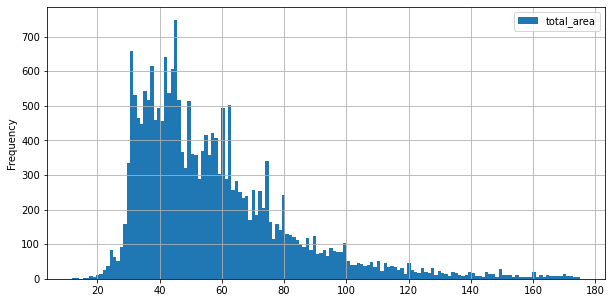

In [42]:
data.plot(y = 'total_area', kind = 'hist', bins = 150, figsize = (10,5), grid=True, range = (12,175))

Из полученной гистограммы видно, что пик гистограммы общей площади примерно на 45 $м^{2}$, значит в данном наборе чаще всего встречаются квартиры данной квадратуры. Также есть пики на 30 $м^{2}$, 42 $м^{2}$, 38 $м^{2}$. Еще есть скачок на 60 $м^{2}$ и 63 $м^{2}$ и крайний пик виден примерно на 72 $м^{2}$ (предположительно от 60 $м^{2}$ трехкомнатные объекты, а значит, их меньше)

In [43]:
data['total_area'].describe().round()

count    21770.0
mean        60.0
std         35.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64

Из  описания видно, что самые распространенныe квартиры общей площадью 35 $м^{2}$

Самые маленькие 12 $м^{2}$

## Жилая площадь

<AxesSubplot:ylabel='Frequency'>

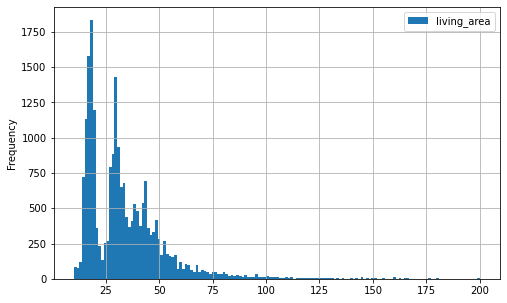

In [44]:
data.plot(y = 'living_area', kind = 'hist', bins = 150, figsize = (8,5), grid=True, range = (10,200))

In [45]:
data['living_area'].describe().round(1)

count    21770.0
mean        34.5
std         22.0
min          6.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: float64

Гистограмма имеет два явных пика. И на распределение Пуассона это уже не похоже. Но у меня есть ощущение, что это наложение двух (а то и трех) типов на одну гистограмму.

## Площадь кухни

<AxesSubplot:ylabel='Frequency'>

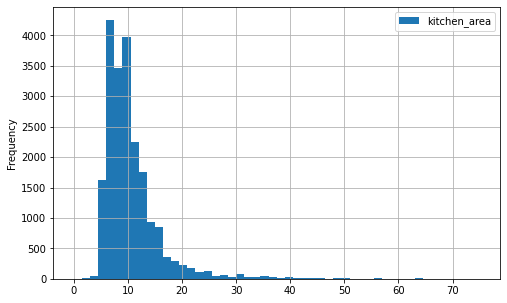

In [46]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, figsize = (8,5), grid=True, range = (0,75))

In [47]:
data['kitchen_area'].describe().round(1)

count    20960.0
mean        10.5
std          5.8
min          1.3
25%          7.0
50%          9.0
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

## Цена объекта

<AxesSubplot:ylabel='Frequency'>

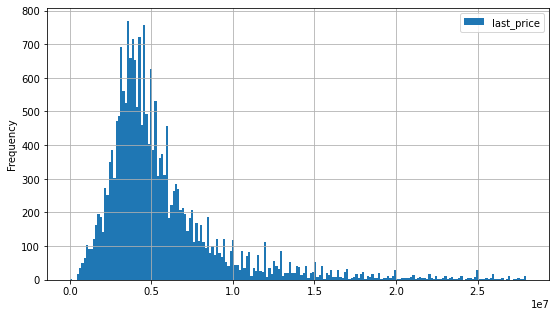

In [48]:
data.plot(y = 'last_price', kind = 'hist', bins = 200, figsize = (9,5), grid=True, range = (0,28000000) )

In [49]:
data['last_price'].describe().round(1)

count        21770.0
mean       6500917.7
std       10865337.2
min          12190.0
25%        3450000.0
50%        4650000.0
75%        6750000.0
max      763000000.0
Name: last_price, dtype: float64

Гистограмма цены имеет нормальное распределение. Пропусков в данном столбце не было (продавец обязательно устанавливает важную для него характеристику)

## Количество комнат

<AxesSubplot:ylabel='Frequency'>

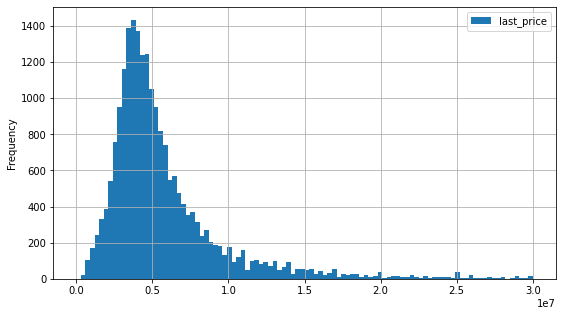

In [50]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, figsize = (9,5), grid=True, range = (0,30000000))

In [51]:
data['rooms'].describe().round()

count    21770.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

Гистограмма распределения имеет нормальный вид. в Среднем недвижимость имеет 2 комнаты. Максимально возможное количество комнат из представленных объектов = 19!

## Высота потолков

<AxesSubplot:ylabel='Frequency'>

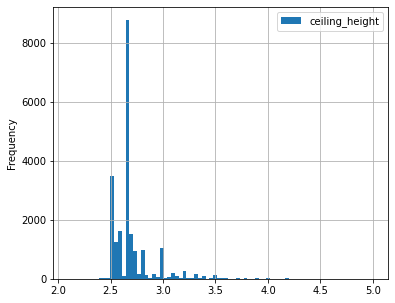

In [52]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 80, figsize = (6,5), grid=True, range = (2.1,5))

In [53]:
data['ceiling_height'].describe()

count    21770.000000
mean         2.697946
std          0.221657
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

Гистограмма имеет странный вид, возможно из-за не совсем верной замены пропусков в данном столбце

## Этаж квартиры

<AxesSubplot:ylabel='Frequency'>

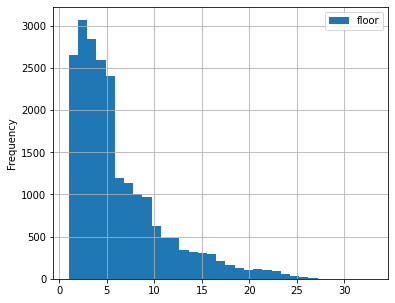

In [54]:
data.plot(y = 'floor', kind = 'hist', bins = 33, figsize = (6,5), grid=True)

In [55]:
data['floor'].describe().round()

count    21770.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

Максимальный этаж в данном массиве 33.

Чаще всего встречаются квартиры на 5-6 этаже.

скорее всего это связано с невысокими постройками в данном наборе.

## Тип этажа квартиры (первый, последний, другой)


<AxesSubplot:ylabel='Frequency'>

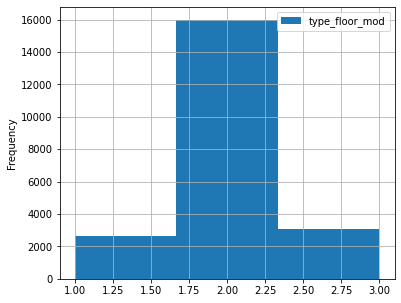

In [56]:
data.plot(y = 'type_floor_mod', kind = 'hist', bins = 3, figsize = (6,5), grid=True)

In [57]:
data['type_floor_mod'].describe().round()

count    21718.0
mean         2.0
std          1.0
min          1.0
25%          2.0
50%          2.0
75%          2.0
max          3.0
Name: type_floor_mod, dtype: float64

Гистограмма вполне предсказуема:пик в середине это средние этажи, а их явно больше, чем первых и последних. Однако правая часть гистограммы чуть больше, а значит верхние этажи продают чаще, чем первые. Я думаю, это может быть связано с тем, что на первых этажах часто располагаются магазины и т.д., и они реже продаются.

## Общее количество этажей в доме

<AxesSubplot:ylabel='Frequency'>

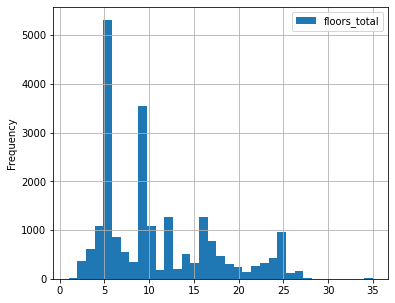

In [58]:
data.plot(y = 'floors_total', kind = 'hist', bins = 35, figsize = (6,5), grid=True, range =(1,35))

In [59]:
data['floors_total'].describe().round()

count    21717.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

Гистограмма имеет весьма страннй вид. 

Во-первых, в данном столбце есть пропуски (я хотела заменить этажем квартиры, но из-за данного пункта не стала типа такого : *data['floors_total'] = data['floors_total'].fillna(data['floor']))*

Во-вторых дома разной этажности в разных микрорайонах. Больше всего домов 5ти этажных, потом пик 9ти этажных, но их меньше, 12, и 17 этажные дома.

## Расстояния гистограммы

### Расстояние до центра города

Тут для меня загадка-зачем ранее в задании требовали перевести в из **м** в **км**, а теперь снова в **м**. Я решила, что нагляднее все-такие в **км**.

<AxesSubplot:ylabel='Frequency'>

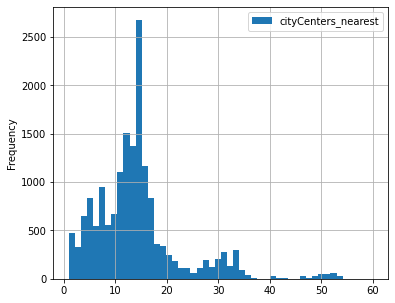

In [60]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, figsize = (6,5), grid=True,  range =(1,60))

В связи с большим количеством пропусков в данном столбце был большой пик на 0 значении. Для наглядности я решила убрать 0 значение и тогда гистограмма по моему мнению имеет более лучший вид. Пик на  15км (я в Питере была, но в км его не измеряла, поэтому поиск выдал вот это :

От Адмиралтейства (условно центр города) до Сосновой поляны радиус 20 км Лахты - 12 км, Девяткино-17 км Парнас -19 км Пр Большевиков. 12 км Рыбацкое - 18 км. Южная граница Купчино - 14 км. 

Примерно эти поселки и были в списке-вот откуда такой пик (я так думаю).

In [61]:
data['cityCenters_nearest'].describe().round()

count    21770.0
mean        11.0
std         10.0
min          0.0
25%          3.0
50%         11.0
75%         15.0
max         66.0
Name: cityCenters_nearest, dtype: float64

### Расстояние до ближайшего аэропорта

<AxesSubplot:ylabel='Frequency'>

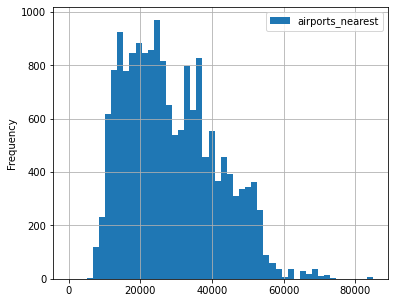

In [62]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 50, figsize = (6,5), grid=True)

In [63]:
data['airports_nearest'].describe().round()

count    16862.0
mean     28768.0
std      12654.0
min          0.0
25%      18539.0
50%      26662.0
75%      37234.0
max      84869.0
Name: airports_nearest, dtype: float64

Итак, гистограмма расстояния до аэропорта имеет плотное распределение. Я так полагаю, что квартиры располагаются от аэропорта Пулковона расстоянии от 12км до 30км (самый распространенный вариант), а также от 35 до 55 км.

### Расстояние до ближайшего парка

<AxesSubplot:ylabel='Frequency'>

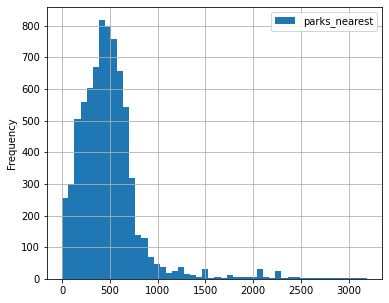

In [64]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, figsize = (6,5), grid=True)

In [65]:
data['parks_nearest'].describe().round()

count    7492.0
mean      488.0
std       338.0
min         1.0
25%       287.0
50%       451.0
75%       610.0
max      3190.0
Name: parks_nearest, dtype: float64

Нормальное распределние (НАКОНЕЦ-ТО)

Санкт-Петербург и его окресности наполнены парками и природными зонами отдыха, поэтому почти с каждыйм объектом недвижимости есть парк.

## День и месяц публикации объявления

### День публикации

<AxesSubplot:ylabel='Frequency'>

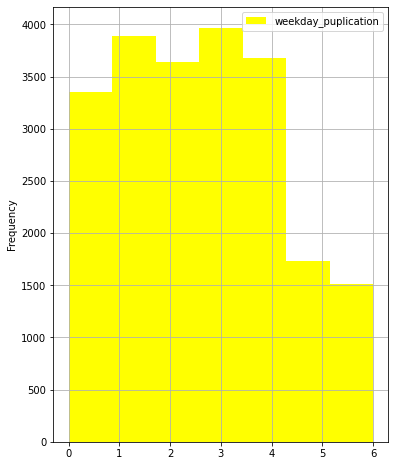

In [66]:
data.plot(y = 'weekday_puplication', color='Yellow', kind = 'hist', bins = 7, figsize = (6,8), grid=True)

In [67]:
data['weekday_puplication'].describe().round()

count    21770.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: weekday_puplication, dtype: float64

Гистограмма для публикации показывает, что чаще всего объясления выставляют в будние дни. Самые низкие показатели в выходные дни.

### Месяц публикации

<AxesSubplot:ylabel='Frequency'>

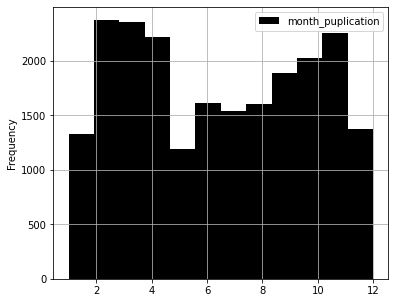

In [68]:
data.plot(y = 'month_puplication', color='Black', kind = 'hist', bins = 12, figsize = (6,5), grid=True)

In [69]:
data['month_puplication'].describe().round()

count    21770.0
mean         6.0
std          3.0
min          1.0
25%          3.0
50%          6.0
75%         10.0
max         12.0
Name: month_puplication, dtype: float64

По гистограмме можно  сделать вывод, что чаще всего квартиры на продажу выставляют весной и чуть меньше осенью. В начале года, в конце и перед летом (май) самые низкие показатели.

## Скорость продажи квартир

In [70]:
print('Медиана скорости продажи объекта:',
data['days_exposition'].median()) #расчет медианы

Медиана скорости продажи объекта: 95.0


In [71]:
print('Средняя скорость продажи объекта:',
data['days_exposition'].mean()) #расчет среднего

Средняя скорость продажи объекта: 172.62962792834176


In [72]:
data['days_exposition'].describe() #общая информация

count    21770.000000
mean       172.629628
std        207.909472
min          1.000000
25%         48.000000
50%         95.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

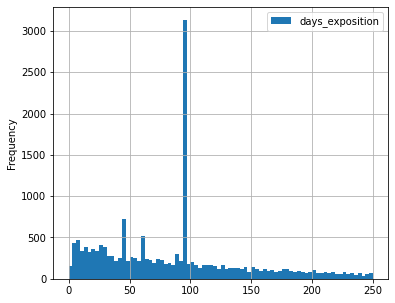

In [73]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 80, figsize = (6,5), grid=True, range = (0, 250))

Гистограмма имеет пик-это заполненные средним значеним пропуски. **В целом квартиры продаются за два месяца или чуть меньше об этом свидетельствует пик около 45 дней и 60 дней**. Есть и более долгие продажи. Я думаю, что время размещения объявления зависит, как и от цены объекта, так и от самого объекта недвижимости. Более долгие проджи могут быть обусловлены неудобным расположением, квадратурой жилья, годом постройки, типом здания и адекватностью продавцов (из собственного опыта).

## Факторы влияющие на стоймость объекта

### Фактор общей площади

<AxesSubplot:xlabel='total_area'>

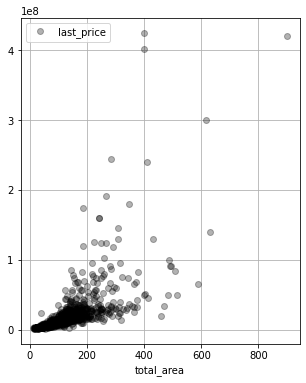

In [74]:
data.pivot_table(index='total_area', values='last_price').plot(color = "Black", style='o', grid=True, figsize=(5, 6), alpha = 0.3)

In [75]:
df_pivot = data.pivot_table(index='total_area', values='last_price')
df_pivot['index'] = df_pivot.index

print('Корреляция цены от общей площади:',
df_pivot['index'].corr(df_pivot['last_price']))

Корреляция цены от общей площади: 0.703027380339859


Из гистограммы рассеивания видно, что с увеличеним площaди объекта увеличивается его стоймость (вполне логично), но и есть объекты колоссально выделяющиеся по стоймости.

### Фактор жилой площади

<AxesSubplot:xlabel='living_area'>

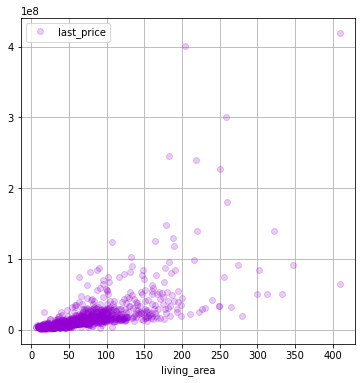

In [76]:
data.pivot_table(index='living_area', values='last_price').plot(color="Darkviolet", style='o', grid=True, figsize=(6, 6), alpha = 0.2)

In [77]:
df_pivot2 = data.pivot_table(index='living_area', values='last_price')
df_pivot2['index'] = df_pivot2.index

print('Корреляция цены от жилой площади:',
df_pivot2['index'].corr(df_pivot2['last_price']))

Корреляция цены от жилой площади: 0.6565549612477484


Как и в предыдущем объекте из гистограммы видно, что с увеличеним жилой площaди объекта увеличивается его стоймость (вполне логично), но и есть объекты колоссально выделяющиеся по стоймости.

### Фактор площади кухни

<AxesSubplot:xlabel='kitchen_area'>

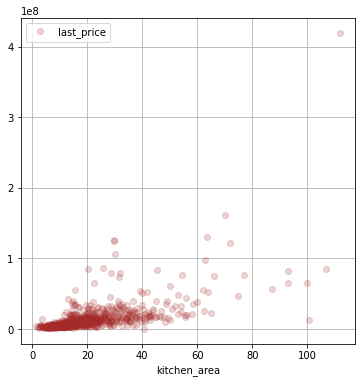

In [78]:
data.pivot_table(index='kitchen_area', values='last_price').plot(color = 'Brown', style='o', grid=True, figsize=(6, 6), alpha = 0.2)

In [79]:
df_pivot3 = data.pivot_table(index='kitchen_area', values='last_price')
df_pivot3['index'] = df_pivot3.index

print('Корреляция цены от площади кухни:',
df_pivot3['index'].corr(df_pivot3['last_price']))

Корреляция цены от площади кухни: 0.6359947210071365


Гистограмма имеет меньший угол наклона, чем с фактором общей площади. 

### Фактор количества комнат

<AxesSubplot:xlabel='rooms'>

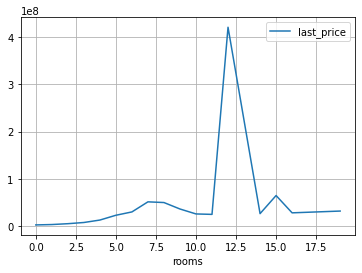

In [80]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True)

In [81]:
df_pivot4 = data.pivot_table(index='rooms', values='last_price')
df_pivot4['index'] = df_pivot4.index

print('Корреляция цены от количества комнат:',
df_pivot4['index'].corr(df_pivot3['last_price']))

Корреляция цены от количества комнат: 0.9703885737278707


Практически линейная зависимость. Есть выбивающиеся значения. Возмножно они возникают от особенностей объекта

### Фактор этажа объекта

<AxesSubplot:xlabel='floor'>

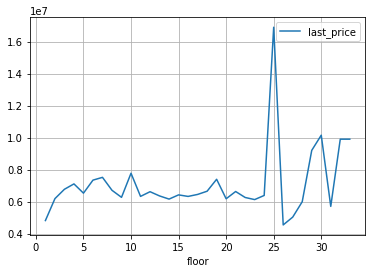

In [82]:
data.pivot_table(index='floor', values='last_price').plot(grid=True)

In [83]:
df_pivot5 = data.pivot_table(index='floor', values='last_price')
df_pivot5['index'] = df_pivot5.index

print('Корреляция цены от количества комнат:',
df_pivot5['index'].corr(df_pivot5['last_price']))

Корреляция цены от количества комнат: 0.309235963529916


Странный результат. получается с ростом этажа с 1го по 4й цена увеличивается, потом чуть падает. И не считая пика объектов на 10х этажах примерно держится на одном уровне. Еще есть скачок объектов располагающихся на 19 этаже и выше 28 этажа. Провал в диапазоне от 21 до 23 этажа.

### Фактор даты размещения

<AxesSubplot:xlabel='weekday_puplication'>

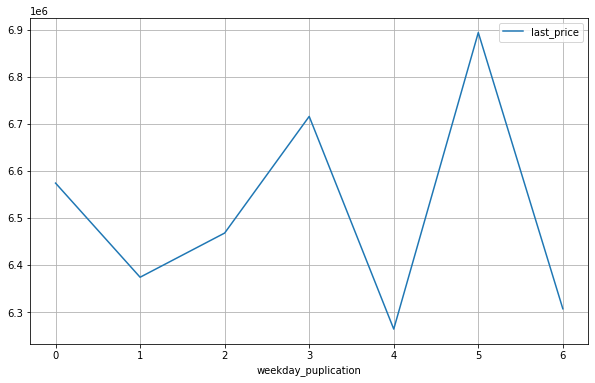

In [84]:
data.pivot_table(index='weekday_puplication', values='last_price').plot( figsize=(10, 6), grid=True)

Из графика видно, что в пятницу размещаются объекты по самым низким ценам. Зато в субботу- по самым высоким.

<AxesSubplot:xlabel='month_puplication'>

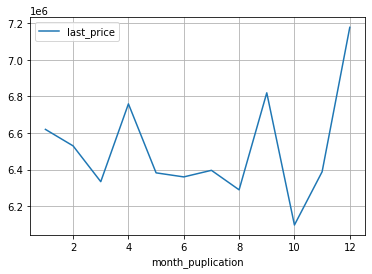

In [85]:
data.pivot_table(index='month_puplication', values='last_price').plot(grid=True) #фактор месяца размещения

По криволинейному графику можно сделать вывод, что в октябре самые низкие цены на объекты недвижимости. Но к Новому году стоймость достигает максимума. Возможно в связи со страхом людей перед неизвестностью, а возможно из-за роста предновогоднего ажиотажа (всем что-то нужно купить и квартиры не исключение)

<AxesSubplot:xlabel='year_puplication'>

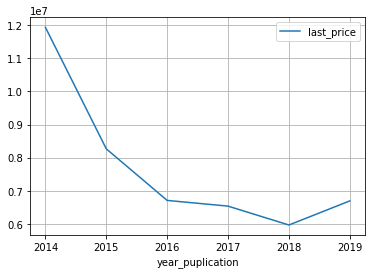

In [86]:
data.pivot_table(index='year_puplication', values='last_price').plot( grid=True)

## Add

<AxesSubplot:xlabel='year_puplication'>

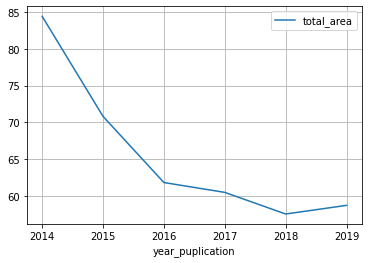

In [87]:
data.pivot_table(index='year_puplication', values='total_area').plot(grid=True)

С 2014 года по 2018 наблюдается резкое падение площади объектов.

<AxesSubplot:xlabel='year_puplication'>

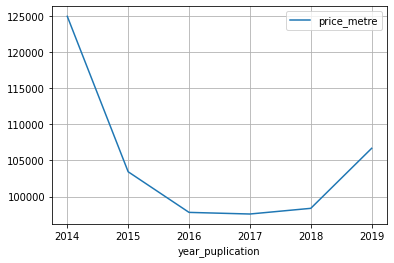

In [88]:
data.pivot_table(index='year_puplication', values='price_metre').plot(grid=True)

С 2014 года по 2018 наблюдается резкое падение стоймости объектов, однако за 2018 год наблюдается тенденция к резкому увеличению стоймости квадратного метра даже выше чем в 2015 году.

# Дополнительные расчеты

In [89]:
top_10_city = data['locality_name'].value_counts().head(10) #выделим 10 строчек из сортированных городов
top_10_city_price = data.query('locality_name in (@top_10_city.index)').pivot_table( index='locality_name', values='last_price')
#по выделенному списку делаем срез и сводим в таблицу по цене
top_10_city_price['last_price'] = top_10_city_price['last_price'].astype(int) #преобразуем цену в целочисленное значение
top_10_city_price.columns = ['Средняя стоймость, ₽'] #переименуем сгруппированный столбец
top_10_city_price.sort_values( by = 'Средняя стоймость, ₽', ascending=False) #отсортируем по убыванию

,"Средняя стоймость, ₽"
locality_name,
Санкт-Петербург,7948071
Пушкин,6492505
посёлок Парголово,4453805
Петергоф,4404071
Кудрово,4324628
посёлок Шушары,4100152
Колпино,3950515
Всеволожск,3795835
Мурино,3699498


In [98]:
large_settlements = data.groupby('locality_name')['last_price'].agg(['median','count']).sort_values(by='count', ascending=False) # Сгруппируем и посчитаем среднюю цену и кол-во объявлений
large_settlements = large_settlements.rename(columns={'median':'Средняя цена', 'count':'Кол-во объявлений'}) # Переименуем столбцы для удобства анализирования
large_settlements.index = large_settlements.index.rename('Название населенного пункта')
large_settlements = large_settlements.head(10)
large_settlements

,Средняя цена,Кол-во объявлений
Название населенного пункта,,
Санкт-Петербург,5500000,14566
Мурино,3400000,523
Кудрово,3800000,423
посёлок Шушары,3950000,404
Всеволожск,3450000,370
Пушкин,5200000,345
Колпино,3600000,328
посёлок Парголово,4100000,301
Гатчина,3095000,292


array([[<AxesSubplot:title={'center':'Средняя стоймость, ₽'}>]],
      dtype=object)

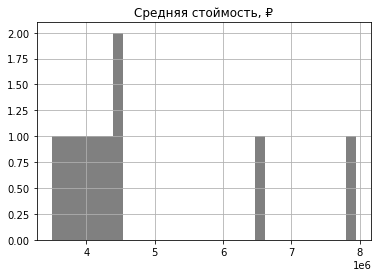

In [90]:
top_10_city_price.sort_values( by = 'Средняя стоймость, ₽', ascending=False).hist(color="Grey", bins = 30, grid=True)

ТОП 10 самых распространенныхгородов среди общего списка показал, что самые дорогие объекты в Санкт-Петербурге, а самые дешевые в Гатчине.

Пушкин - город второй по высокой стоймости объекта. Я думаю, это связано с его историей и знаменитыми объектами на территории города.

В Гатчине располагается институт ПИЯФ (Петербургский институт ядерной физики), такое соседство не особо располагает потенциального покупателя, отсюда и низкая стоймость объектов.

<AxesSubplot:xlabel='cityCenters_nearest'>

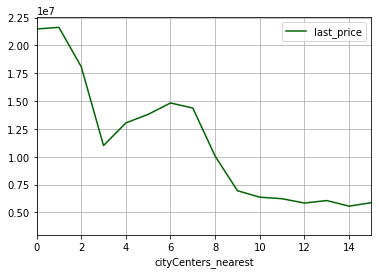

In [91]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True,color="DarkGreen", xlim=(0,15))

In [92]:
price_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest', values='last_price')
#срез по одному городу
price_km['last_price']= price_km['last_price'].astype(int) #преобразуем цену в целочисленное значение
price_km.columns = ['Средняя стоймость, ₽'] #переименуем сгруппированный столбец
price_km

,"Средняя стоймость, ₽"
cityCenters_nearest,
0.0,21482104
1.0,21631714
2.0,18096195
3.0,11009464
4.0,13040108
5.0,13813967
6.0,14835943
7.0,14379874
8.0,10057497


Стоймость объектов зависит от расстояния до центра города. Самые дорогие объекты именно в центре. С увеличением дальности от центра стоймость снижается, но не равномерно. Возможно, пик на 6км от центра связан с каким-то культурным достоянием или с расположением метро.
    
Далее 9км стоймость практически не меняется

# Общий вывод

**Во время анализа данных Яндекс.Недвижимости после изучения общей информации, я провела предобработку данных,в которой были убраны пропуски значений в некоторых столбцах. Изменен тип данных для более упрощенной визуализации данных на графиках и гистограммах. Для анализа была произведенена категоризация данных по общей этажности объектов недвижимости. Также была проведена проверка на дубликаты, которая не выявила дублирующихся строк, однако во время поиска неявных дубликатов, такие имели место быть, но не долго, потому что были заменены по общим правилам. Для наглядности результатов анализа были добавлены значения стоймости квадратного метра объекта недвижимости, а также календарные данные.
    Анализ производился по общей площади объектов, по жилой площадт, по площади кухни, цены объекта, количеству комнат объекта, номер этажа расположения объекта, расстояния до важных точек города (парки, центр города), день и месяц публикации объявления на Яндекс.Недвижимость, скорость продажи объекта и возможные факторы, влияющие на нее.**
    
    
В результате анализа Яндекс.Недвижимости — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, я сделала следующие выводы:

Стоймость объекта может зависеть от многочисленных параметров:

1) Цена объекта растет с увеличением общей площади, жилой площади и площади кухни;
    
2) Цена зависит от года публикации объявления. Например в 2014 году цены были высокие, а после цены пошли в низ до 2018 года. К наступлению 2019 стоймость стала увеличиваться. **Это связано с уменьшением общей площади жилья и снижением стоймости квадратного метра. Однако в течение 2018 года стоймость квадратного метра резко увеличилась (Год проведения ЧМ по Футболу) и увеличилась квадратру, однако рост цены более резкий нежели рост общей площади объектов недвижимости**;
    
3) Замечена тендеция увеличения цены к концу года и падение цен в октябре месяце (после отпусков летом чаще всего у населения нет финансов и цены часто падают и на автомобильном рынке, например);
    
4) Чаще всего объявления о продаже размещают в будние дни, однако в эти дни цена не завышена, а редкие объявления - в выходные дни имеют самую высокую стоймость объектов недвижимости;

5) Стоймость квартиры зависит от расположения объекта: близость к центру города гарантирует увеличение цен на объект, но удаление от центра города снижает стоймость квадратного метра объекта;
    
6) Количество комнат увеличивают квадратуру объекта, следовательно увеличивают и стоймость объекта;
    
7) Ценообразование зависит от населенного пункта. Например самые дорогие объекты расположены в Санкт-Петербурге (почти 8 миллионов рублей), а самые дешевые в городе Гатчина (примерно 3,5 миллиона рублей);

8) Наличие балкона увеличивает общую площадь объекта, а ее увеличение приводит к росту цены.
    
Ценооразование объектов недвижимости подчиняется многочисленным законам, исследование которых необходимо, чтобы объект был продан/куплен с максимальной выгодой, как для продавца, так и для покупателя. Разнообразие объектов диктует разнообразие цен, однако общие зависимости роста/снижения цены были представлены выше.
